Analysis of Data

1. When analysing the Mean tumour size over time with the drugs on the first figure, capomulin displayed continual reduction in tumour volume. Infubinol and Ketapril showed similar results to the placebo showing that the two drugs show no use.

2. In the second figure, Capomulin again showed promising results. Metastic sites grew on each drug on average and Capomulin showed the slowest rate or growth.  Ketapril showed a similar rate to the Placebo and Infubinol showed to be a rate between the capomuline and the placebo.

3. The final figure concerns the rate of survival during the drug treatment. Again, Capomulin showed promising results by having the highest survival rate in the 45 day study.  The other two drugs showed relatively poor survival rates at below 50%.

This demonstrates that the drug Capomulin works well in mice models.  The only way to know if it is good for humans is to do human studies with the same drugs.

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_csv = os.path.join("data","mouse_drug_data.csv")

clinical_trial_csv= os.path.join("data","clinicaltrial_data.csv")

mouse_df = pd.read_csv(mouse_drug_csv)
clinical_df = pd.read_csv(clinical_trial_csv)

# sanity checks
# print(f"Mouse Data set:\n{mouse_df}\n")
# print(f"Clinical Data set:\n{clinical_df}")

merged_df = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="inner")

tumours_df = merged_df.sort_values(["Timepoint","Metastatic Sites"])
tumours_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
10,f932,0,45.0,0,Ketapril
11,g107,0,45.0,0,Ketapril
19,a457,0,45.0,0,Ketapril
22,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumours_groupby = tumours_df.groupby(["Drug","Timepoint"])
tumours_mean_values = tumours_groupby["Tumor Volume (mm3)"].mean()
tumours_mean_values
tumours_groupby["Timepoint"].head()

# Convert to DataFrame

drug_treatment_mean_df = pd.DataFrame({"Tumor Volume Mean (mm3)":tumours_mean_values})
drug_treatment_mean_df.reset_index(level=0, inplace=True)
drug_treatment_mean_df.reset_index(level=0, inplace=True)

# # Preview DataFrame

drug_treatment_mean_df.head()

,Timepoint,Drug,Tumor Volume Mean (mm3)
0,0,Capomulin,45.000000
1,5,Capomulin,44.266086
2,10,Capomulin,43.084291
3,15,Capomulin,42.064317
4,20,Capomulin,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumours_standard_error = tumours_groupby["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
drug_treatment_standard_error_df = pd.DataFrame({"Tumor Volume Standard Error (mm3)":tumours_standard_error})
drug_treatment_standard_error_df.reset_index(level=0, inplace=True)
drug_treatment_standard_error_df.reset_index(level=0, inplace=True)

# Preview DataFrame
drug_treatment_standard_error_df

,Timepoint,Drug,Tumor Volume Standard Error (mm3)
0,0,Capomulin,0.000000
1,5,Capomulin,0.448593
2,10,Capomulin,0.702684
3,15,Capomulin,0.838617
4,20,Capomulin,0.909731
...,...,...,...
95,25,Zoniferol,0.602513
96,30,Zoniferol,0.800043
97,35,Zoniferol,0.881426
98,40,Zoniferol,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drug_mean_tumour_pivot_df = drug_treatment_mean_df.pivot(index = "Timepoint", columns = "Drug",values="Tumor Volume Mean (mm3)")
# Preview that Reformatting worked
drug_mean_tumour_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
 # Tumour mean data per drug
Capomulin_data = drug_mean_tumour_pivot_df.iloc[:,0]
# sanity check
# print(f"{Capomulin_data}\n")

Infubinol_data = drug_mean_tumour_pivot_df.iloc[:,2]
# sanity check
# print(f"{Infubinol_data}\n")

Ketapril_data = drug_mean_tumour_pivot_df.iloc[:,3]
# sanity check
# print(f"{Ketapril_data}\n")

Placebo_data = drug_mean_tumour_pivot_df.iloc[:,5]
# sanity check
# print(f"{Placebo_data}")

# y error values per drug
y_error_Capomulin = drug_treatment_standard_error_df.loc[drug_treatment_standard_error_df["Drug"]=="Capomulin","Tumor Volume Standard Error (mm3)"]
# sanity check
# print(y_error_Capomulin)

y_error_Infubinol = drug_treatment_standard_error_df.loc[drug_treatment_standard_error_df["Drug"]=="Infubinol","Tumor Volume Standard Error (mm3)"]
# sanity check
# print(y_error_Infubinol)

y_error_Ketapril = drug_treatment_standard_error_df.loc[drug_treatment_standard_error_df["Drug"]=="Ketapril","Tumor Volume Standard Error (mm3)"]
# sanity check
# print(y_error_Ketapril)

y_error_Placebo = drug_treatment_standard_error_df.loc[drug_treatment_standard_error_df["Drug"]=="Placebo","Tumor Volume Standard Error (mm3)"]
# sanity check
# print(y_error_Placebo)

<IPython.core.display.Javascript object>


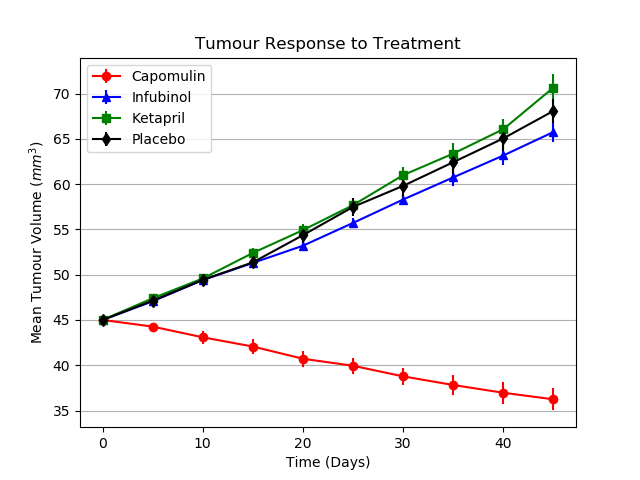

In [6]:
# Generate the Plot (with Error Bars)

fig1, ax1 = plt.subplots()

x_val = [i*5 for i in range(10)]


# ax1.plot(x_val,Capomulin_data,marker='o',color="red",label="Capomulin")
# ax1.plot(x_val,Infubinol_data,marker='^',color="blue",label="Infubinol")
# ax1.plot(x_val,Ketapril_data,marker='s',color="green",label="Ketapril")
# ax1.plot(x_val,Placebo_data,marker='d',color="black",label="Placebo")

# Showing and configuring the figure
ax1.errorbar(x_val,Capomulin_data, yerr=y_error_Capomulin, marker='o', color="red", label="Capomulin")
ax1.errorbar(x_val,Infubinol_data, yerr=y_error_Infubinol, marker='^', color="blue", label="Infubinol")
ax1.errorbar(x_val,Ketapril_data, yerr=y_error_Ketapril, marker='s', color="green", label="Ketapril")
ax1.errorbar(x_val,Placebo_data, yerr=y_error_Placebo, marker='d', color="black", label="Placebo")


ax1.set_title("Tumour Response to Treatment")
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Mean Tumour Volume ($mm^3$)")
ax1.grid(axis = 'y')
ax1.legend()

# Save the Figure
fig1.savefig("Fig 1 - Tumour Response to Treatment.png")

# Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastic_groupby = tumours_df.groupby(["Drug","Timepoint"])
metastic_mean_values = metastic_groupby["Metastatic Sites"].mean()
metastic_mean_values.head()

# Convert to DataFrame
metastic_sites_mean_df = pd.DataFrame({"Metastatic Sites Mean":metastic_mean_values})
metastic_sites_mean_df.reset_index(level=0, inplace=True)
metastic_sites_mean_df.reset_index(level=0, inplace=True)

# Preview DataFrame
metastic_sites_mean_df.head()

,Timepoint,Drug,Metastatic Sites Mean
0,0,Capomulin,0.000000
1,5,Capomulin,0.160000
2,10,Capomulin,0.320000
3,15,Capomulin,0.375000
4,20,Capomulin,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastic_sites_standard_error = metastic_groupby["Metastatic Sites"].sem()
# Convert to DataFrame
metastic_sites_standard_error_df = pd.DataFrame({"Metastatic Sites Standard Error":metastic_sites_standard_error})
metastic_sites_standard_error_df.reset_index(level=0, inplace=True)
metastic_sites_standard_error_df.reset_index(level=0, inplace=True)
# Preview DataFrame
metastic_sites_standard_error_df.head()

,Timepoint,Drug,Metastatic Sites Standard Error
0,0,Capomulin,0.000000
1,5,Capomulin,0.074833
2,10,Capomulin,0.125433
3,15,Capomulin,0.132048
4,20,Capomulin,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastic_sites_mean_pivot = metastic_sites_mean_df.pivot(index = "Timepoint", columns = "Drug")
# Preview that Reformatting worked
metastic_sites_mean_pivot

Metastatic Sites Mean                                          \
Drug                  Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                                 
0                      0.000000  0.000000  0.000000  0.000000  0.000000   
5                      0.160000  0.380952  0.280000  0.304348  0.260870   
10                     0.320000  0.600000  0.666667  0.590909  0.523810   
15                     0.375000  0.789474  0.904762  0.842105  0.857143   
20                     0.652174  1.111111  1.050000  1.210526  1.150000   
25                     0.818182  1.500000  1.277778  1.631579  1.500000   
30                     1.090909  1.937500  1.588235  2.055556  2.066667   
35                     1.181818  2.071429  1.666667  2.294118  2.266667   
40                     1.380952  2.357143  2.100000  2.733333  2.466667   
45                     1.476190  2.692308  2.111111  3.363636  2.538462   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.375000  0.320000  0.120000  0.240000  0.166667  
10         0.833333  0.565217  0.250000  0.478261  0.500000  
15         1.250000  0.764706  0.333333  0.782609  0.809524  
20         1.526316  1.000000  0.347826  0.952381  1.294118  
25         1.941176  1.357143  0.652174  1.157895  1.687500  
30         2.266667  1.615385  0.782609  1.388889  1.933333  
35         2.642857  2.300000  0.952381  1.562500  2.285714  
40         3.166667  2.777778  1.100000  1.583333  2.785714  
45         3.272727  2.571429  1.250000  1.727273  3.071429

In [10]:
# Tumour mean data per drug
Capomulin_data = metastic_sites_mean_pivot.iloc[:,0]
# sanity check
# print(f"{Capomulin_data}\n")

Infubinol_data = metastic_sites_mean_pivot.iloc[:,2]
# sanity check
# print(f"{Infubinol_data}\n")

Ketapril_data = metastic_sites_mean_pivot.iloc[:,3]
# sanity check
# print(f"{Ketapril_data}\n")

Placebo_data = metastic_sites_mean_pivot.iloc[:,5]
# sanity check
# print(f"{Placebo_data}")

# y error values per drug
y_error_Capomulin = metastic_sites_standard_error_df.loc[metastic_sites_standard_error_df["Drug"]=="Capomulin","Metastatic Sites Standard Error"]
# sanity check
# print(y_error_Capomulin)

y_error_Infubinol = metastic_sites_standard_error_df.loc[metastic_sites_standard_error_df["Drug"]=="Infubinol","Metastatic Sites Standard Error"]
# sanity check
# print(y_error_Infubinol)

y_error_Ketapril = metastic_sites_standard_error_df.loc[metastic_sites_standard_error_df["Drug"]=="Ketapril","Metastatic Sites Standard Error"]
# sanity check
# print(y_error_Ketapril)

y_error_Placebo = metastic_sites_standard_error_df.loc[metastic_sites_standard_error_df["Drug"]=="Placebo","Metastatic Sites Standard Error"]
# sanity check
# print(y_error_Placebo)

<IPython.core.display.Javascript object>


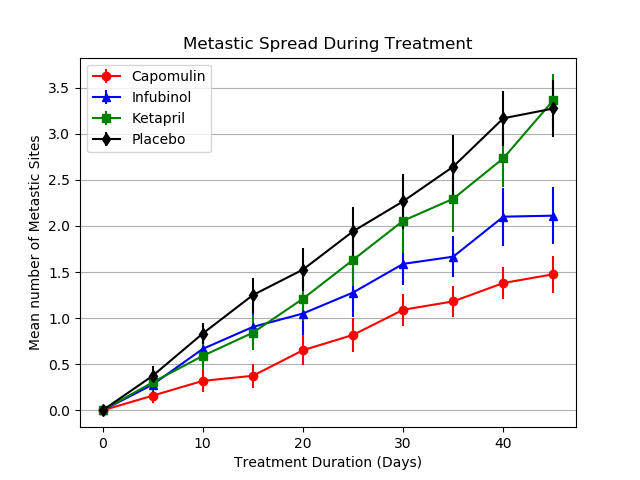

In [11]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()

x_val = [i*5 for i in range(10)]


# ax1.plot(x_val,Capomulin_data,marker='o',color="red",label="Capomulin")
# ax1.plot(x_val,Infubinol_data,marker='^',color="blue",label="Infubinol")
# ax1.plot(x_val,Ketapril_data,marker='s',color="green",label="Ketapril")
# ax1.plot(x_val,Placebo_data,marker='d',color="black",label="Placebo")

# Showing and configuring the figure
ax2.errorbar(x_val,Capomulin_data, yerr=y_error_Capomulin, marker='o', color="red", label="Capomulin")
ax2.errorbar(x_val,Infubinol_data, yerr=y_error_Infubinol, marker='^', color="blue", label="Infubinol")
ax2.errorbar(x_val,Ketapril_data, yerr=y_error_Ketapril, marker='s', color="green", label="Ketapril")
ax2.errorbar(x_val,Placebo_data, yerr=y_error_Placebo, marker='d', color="black", label="Placebo")

ax2.set_title("Metastic Spread During Treatment")
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Mean number of Metastic Sites")
ax2.grid(axis = 'y')
ax2.legend();

# Save the Figure
fig2.savefig("Fig 2 - Metastic Spread During Treatment.png")

# Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df= tumours_df[["Timepoint","Drug","Mouse ID"]]
# mice_df
mice_groupby = mice_df.groupby(["Timepoint","Drug"])
mice_count = mice_groupby["Mouse ID"].count()

# Convert to DataFrame
mice_survival_df = pd.DataFrame({"Mouse Count":mice_count})
mice_survival_df.reset_index(level=0, inplace=True)
mice_survival_df.reset_index(level=0, inplace=True)
mice_survival_df.sort_values(by=["Drug","Timepoint"])
# Preview DataFrame
mice_survival_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Ceftamin,0,25
2,Infubinol,0,25
3,Ketapril,0,25
4,Naftisol,0,25


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_pivot = mice_survival_df.pivot(index = "Timepoint", columns = "Drug")
# Preview the Data Frame
mice_survival_pivot.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [14]:
# Drug survival rates as a percentages
def drug_percentages(drug):
    if drug == "Capomulin":
        return (mice_survival_pivot.iloc[:,0]/mice_survival_pivot.iloc[0,0])*100
    elif drug == "Infubinol":
        return (mice_survival_pivot.iloc[:,2]/mice_survival_pivot.iloc[0,2])*100
    elif drug == "Ketapril":
        return (mice_survival_pivot.iloc[:,3]/mice_survival_pivot.iloc[0,3])*100
    elif drug == "Placebo":
        return (mice_survival_pivot.iloc[:,5]/mice_survival_pivot.iloc[0,5])*100
    else:
        return "Please enter the following drugs only: Capomulin, Infubinol, Ketapril, Placebo"

# Drugs:
#     Capomulin
Capomulin_Percent = drug_percentages("Capomulin")
# Sanity check
# print(f"{Capomulin_Percent}\n")

#     Infubinol
Infubinol_Percent = drug_percentages("Infubinol")
# Sanity check
# print(f"{Infubinol_Percent}\n")

#     Ketapril
Ketapril_Percent = drug_percentages("Ketapril")
# Sanity check
# print(f"{Ketapril_Percent}\n")

#     Placebo
Placebo_Percent = drug_percentages("Placebo")
# Sanity check
# print(f"{Placebo_Percent}\n")

<IPython.core.display.Javascript object>


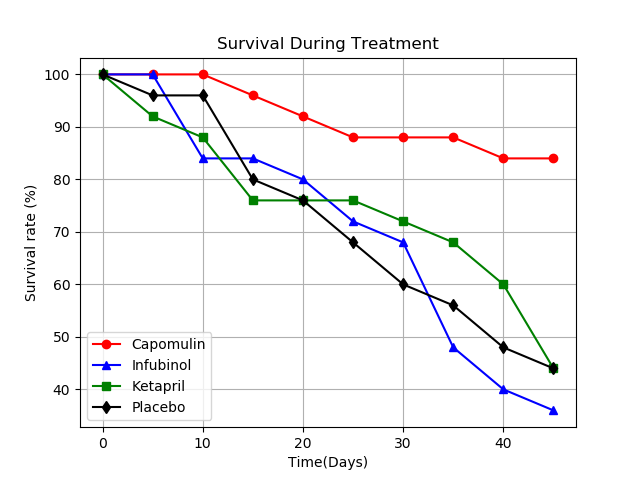

In [15]:
# Generate the Plot (Accounting for percentages)
fig3, ax3 = plt.subplots()
x_val = [i*5 for i in range(10)]

ax3.plot(x_val,Capomulin_Percent,marker='o',color="red",label="Capomulin")
ax3.plot(x_val,Infubinol_Percent,marker='^',color="blue",label="Infubinol")
ax3.plot(x_val,Ketapril_Percent,marker='s',color="green",label="Ketapril")
ax3.plot(x_val,Placebo_Percent,marker='d',color="black",label="Placebo")
ax3.legend()
ax3.grid()
ax3.set_title("Survival During Treatment")
ax3.set_xlabel("Time(Days)")
ax3.set_ylabel("Survival rate (%)");

# Save the Figure
fig3.savefig("Fig 3 - Survival During Treatment")
# Show the Figure

# Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
drug_mean_tumour_v2 = drug_mean_tumour_pivot_df.copy()

drug_percent_change = (drug_mean_tumour_v2.iloc[-1]/(drug_mean_tumour_v2.iloc[0])-1)*100

# Display the data to confirm

print(drug_percent_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


<IPython.core.display.Javascript object>


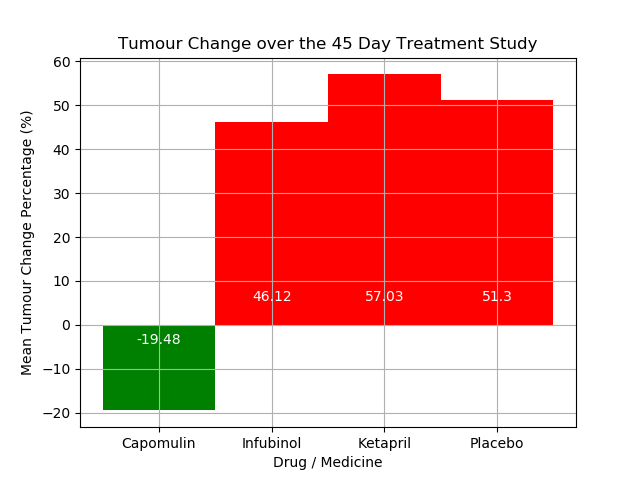

In [17]:
# Store all Relevant Percent Changes into a Tuple
passing_drugs = drug_percent_change < 0
# print(passing_drugs)

# Splice the data between passing and failing drugs
drugs_list = ['Capomulin','Infubinol','Ketapril','Placebo']
percent_change_drugs_list = [round(drug_percent_change[drug],2) for drug in drugs_list]
# print(percent_change_drugs_list)

# Orient widths. Add labels, tick marks, etc. 
fig4, ax4 = plt.subplots()

pass_fail_colours = passing_drugs.map({True: 'g', False: 'r'})
y = [1,2,3,4]
ax4.grid()
ax4.set_title('Tumour Change over the 45 Day Treatment Study');
ax4.set_xlabel('Drug / Medicine');
ax4.set_ylabel('Mean Tumour Change Percentage (%)');
final_chart = ax4.bar(drugs_list, percent_change_drugs_list,width=-1,color=pass_fail_colours)

# Use functions to label the percentages of changes
def label_maker(rects):
    for rect in rects:
        height = rect.get_height()
        
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        
        ax4.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2.0, label_position),
                    xytext=(0, 9), textcoords="offset points", 
                     ha='center',va='bottom',color='w')

# Call functions to implement the function calls
label_maker(final_chart);

# Save the Figure
fig4.savefig('Fig 4 - Tumour Change over the 45 Day Treatment Study')

# Show the Figure
fig4;